<img src="images/polynomial_regression.png" alt="drawing" />

# **Polynomial Regression**

Import all the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

from joblib import dump, load

### Data Preperation

Load in the data from the csv file and extract the feautres from the dataset

In [2]:
advertising = pd.read_csv('Advertising.csv')

X = advertising.drop(columns='sales')
y = advertising['sales']
X.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'Advertising.csv'

Convert features $X$ into polynomial features

In [ ]:
feature_converter = PolynomialFeatures(degree=2, include_bias=False)
features = feature_converter.fit_transform(X)  # perform fit and transform 

### Feauture Conversion Inspection

In [ ]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [ ]:
features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
A = X['TV'][0]
B = X['radio'][0]
C = X['newspaper'][0]

print(f'{A = }')
print(f'{B = }')
print(f'{C = }')
print()
print(f'{A*B = }')
print(f'{B*C = }')
print(f'{C*A = }')
print()
print(f'{A*A = }')
print(f'{B*B = }')
print(f'{C*C = }')

[A, B, C, A*A, A*B, C*A, B*B, B*C, C*C]

A = 230.1
B = 37.8
C = 69.2

A*B = 8697.779999999999
B*C = 2615.7599999999998
C*A = 15922.92

A*A = 52946.009999999995
B*B = 1428.8399999999997
C*C = 4788.64


[230.1,
 37.8,
 69.2,
 52946.009999999995,
 8697.779999999999,
 15922.92,
 1428.8399999999997,
 2615.7599999999998,
 4788.64]

### Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_test = model.predict(X_test)
model.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [ ]:
MAE = mean_absolute_error(y_test, y_pred_test)
MSE = mean_squared_error(y_test, y_pred_test)
RMSE = np.sqrt(MSE)

print(f'MAE = {round(MAE, 2)}')
print(f'RMSE = {round(RMSE, 2)}')


MAE = 0.55
RMSE = 0.68


Compared to _Ordinary Linear Regression_ the MAE and RMSE for the _Polynomial Regression_ are much lower, suggesting a _Polynomial Regression_ model would be more accurate

|   | OrdLinReg  | PolyReg  |
|---|---|---|
| MAE  |  1.49 | 0.55  |
| RMSE  | 1.93  | 0.68  |

In [ ]:
RMSE_train = []
RMSE_test = []
degrees = np.arange(1, 10)

for deg in degrees:
    converter = PolynomialFeatures(degree=deg, include_bias=False)
    features = converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))    

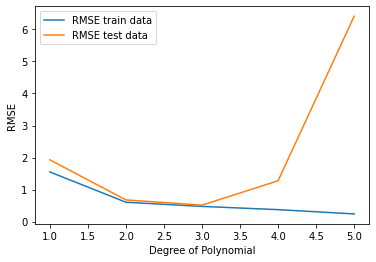

In [ ]:
plt.plot(degrees[0:5], RMSE_train[0:5], label='RMSE train data')
plt.plot(degrees[0:5], RMSE_test[0:5], label='RMSE test data')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')

plt.legend()


At a 3rd degree polynomial the test data error increases drastically, suggesting a 3rd degree polynomial is best to model the sales. 

### Save Model

In [ ]:
final_converter = PolynomialFeatures(degree=3, include_bias=False)
final_model = LinearRegression()

final_features = final_converter.fit_transform(X)
final_model.fit(final_features, y)

LinearRegression()

In [ ]:
dump(final_model, 'final_sales_poly_reg.joblib')
dump(final_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

### Load Model

In [ ]:
loaded_converter = load('final_poly_converter.joblib')
loaded_model = load('final_sales_poly_reg.joblib')

In [ ]:
campaign = [[149, 22, 12]]
campagin_features = loaded_converter.fit_transform(campaign)
loaded_model.predict(campagin_features)

array([14.64501014])